<a href="https://colab.research.google.com/github/amanmaurya7/data-science-collab/blob/main/data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# 1. Employee_Info.csv dummy data banate hain
data1 = {
    'Emp_ID': [101, 102, 103, 104, 105, 106, 107, 108],
    'Name': ['Aarav', 'Vihaan', 'Aditya', 'Sai', 'Reyansh', 'Arjun', 'Vivaan', 'Rohan'],
    'Region': ['North', 'North', 'South', 'South', 'East', 'East', 'West', 'West'],
    'Years Experience': [5, 3, 99, 4, 2, 6, 8, 99],  # 99 outlier hai (Question point 4)
    'Travel Days': [15, np.nan, 12, 20, np.nan, 10, 5, 25]  # Missing values (Question point 3)
}
df_emp = pd.DataFrame(data1)
df_emp.to_csv('Employee_Info.csv', index=False)

# 2. Sales_Data.csv dummy data banate hain
data2 = {
    'Employee_ID': [101, 102, 103, 104, 105, 106, 107, 108],
    'Sales Achieved': [50000, 52000, np.nan, 48000, 30000, np.nan, 60000, 62000], # Missing values
    'Quarterly Quota': [45000, 45000, 45000, 45000, 40000, 40000, 55000, 55000],
    'Customer Count': [10, 12, 8, 11, 5, 9, 15, 16]
}
df_sales = pd.DataFrame(data2)
df_sales.to_csv('Sales_Data.csv', index=False)

print("Files created: Employee_Info.csv and Sales_Data.csv")

Files created: Employee_Info.csv and Sales_Data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
df1 = pd.read_csv('Employee_Info.csv')
df2 = pd.read_csv('Sales_Data.csv')

# 2. Merge Dataframes
# Note: Ek mein Emp_ID hai, dusre mein Employee_ID hai.
df_combined = pd.merge(df1, df2, left_on='Emp_ID', right_on='Employee_ID', how='inner')

# Check karte hain result
print("Columns after merge:", df_combined.columns)
df_combined.head()

Columns after merge: Index(['Emp_ID', 'Name', 'Region', 'Years Experience', 'Travel Days',
       'Employee_ID', 'Sales Achieved', 'Quarterly Quota', 'Customer Count'],
      dtype='object')


,Emp_ID,Name,Region,Years Experience,Travel Days,Employee_ID,Sales Achieved,Quarterly Quota,Customer Count
0,101,Aarav,North,5,15.0,101,50000.0,45000,10
1,102,Vihaan,North,3,NaN,102,52000.0,45000,12
2,103,Aditya,South,99,12.0,103,NaN,45000,8
3,104,Sai,South,4,20.0,104,48000.0,45000,11
4,105,Reyansh,East,2,NaN,105,30000.0,40000,5


In [3]:
# 3. Fill Missing Values

# Part i: Travel Days ko overall Mean se fill karna
mean_travel = df_combined['Travel Days'].mean()
df_combined['Travel Days'] = df_combined['Travel Days'].fillna(mean_travel)

# Part ii: Sales Achieved ko 'Region' ke specific Median se fill karna
# Logic: 'transform' function group ke andar calculation karke wapas original shape mein deta hai
df_combined['Sales Achieved'] = df_combined['Sales Achieved'].fillna(
    df_combined.groupby('Region')['Sales Achieved'].transform('median')
)

# Verify karte hain ki null values hat gayi ya nahi
print(df_combined.isnull().sum())

Emp_ID              0
Name                0
Region              0
Years Experience    0
Travel Days         0
Employee_ID         0
Sales Achieved      0
Quarterly Quota     0
Customer Count      0
dtype: int64


In [4]:
print("Columns after merge:", df_combined.columns)
df_combined.head()

Columns after merge: Index(['Emp_ID', 'Name', 'Region', 'Years Experience', 'Travel Days',
       'Employee_ID', 'Sales Achieved', 'Quarterly Quota', 'Customer Count'],
      dtype='object')


,Emp_ID,Name,Region,Years Experience,Travel Days,Employee_ID,Sales Achieved,Quarterly Quota,Customer Count
0,101,Aarav,North,5,15.0,101,50000.0,45000,10
1,102,Vihaan,North,3,14.5,102,52000.0,45000,12
2,103,Aditya,South,99,12.0,103,48000.0,45000,8
3,104,Sai,South,4,20.0,104,48000.0,45000,11
4,105,Reyansh,East,2,14.5,105,30000.0,40000,5


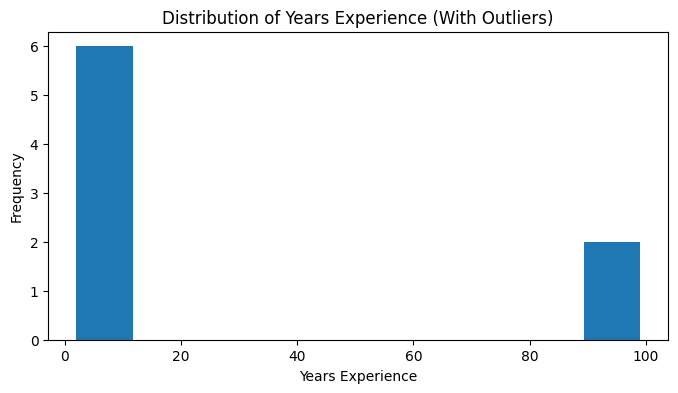

In [5]:
plt.figure(figsize=(8, 4))
plt.hist(df_combined['Years Experience'], bins=10)
plt.title("Distribution of Years Experience (With Outliers)")
plt.xlabel("Years Experience")
plt.ylabel("Frequency")
plt.show()


In [6]:
# Step B: 99 ko replace karna
# Logic: Pehle wo values nikalo jo 99 nahi hain, unka median lo
median_valid_exp = df_combined[df_combined['Years Experience'] != 99]['Years Experience'].median()

# Replace 99 with that median
df_combined['Years Experience'] = df_combined['Years Experience'].replace(99, median_valid_exp)

print(f"Outlier 99 replaced with Median: {median_valid_exp}")
print(df_combined['Years Experience'])

Outlier 99 replaced with Median: 4.5
0    5.0
1    3.0
2    4.5
3    4.0
4    2.0
5    6.0
6    8.0
7    4.5
Name: Years Experience, dtype: float64


In [7]:
# 5. Region Summary

# Group by Region and calculate mean
region_summary = df_combined.groupby('Region')[['Sales Achieved', 'Quarterly Quota', 'Customer Count']].mean()

print("Region Summary DataFrame:")
print(region_summary)

# Identify Region with Highest Average 'Sales Achieved'
best_region = region_summary['Sales Achieved'].idxmax()
highest_sales = region_summary['Sales Achieved'].max()

print(f"\nRegion with Highest Sales: {best_region} ({highest_sales})")

Region Summary DataFrame:
        Sales Achieved  Quarterly Quota  Customer Count
Region                                                 
East           30000.0          40000.0             7.0
North          51000.0          45000.0            11.0
South          48000.0          45000.0             9.5
West           61000.0          55000.0            15.5

Region with Highest Sales: West (61000.0)
